# Este Notebook tem como propósito o intuito de mostrar de maneira muito simplificada como utilzar os modelos mais clássicos de Machine Learning e alguns de Deep Learning para previsão.

### Como o intuito é simplesmente exemplificar os modelos não iremos abordar questões como Normalização dos dados, Estratificação, Otimização de Hiperparâmetros, Reguralização, Redução de Dimensionalidade etc, Encoding de Variáveis Categóricas, Validação Cruzada etc.

#### Regressores

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

#generic code that receives the dataset and the choosen regressor as parameter
def Train_Model(model, diabetes):
    # Use only one feature
    diabetes_X = diabetes.data[:, np.newaxis, 2]

    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]

    # Split the targets into training/testing sets
    diabetes_y_train = diabetes.target[:-20]
    diabetes_y_test = diabetes.target[-20:]

    # Create regressor model
    regr = model

    # Train the model using the training sets
    regr.fit(diabetes_X_train, diabetes_y_train)

    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)
    print(diabetes_y_pred)

    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(diabetes_y_test, diabetes_y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

    # Plot outputs
    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.scatter(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()
    

### Linear Regression

[225.9732401  115.74763374 163.27610621 114.73638965 120.80385422
 158.21988574 236.08568105 121.81509832  99.56772822 123.83758651
 204.73711411  96.53399594 154.17490936 130.91629517  83.3878227
 171.36605897 137.99500384 137.99500384 189.56845268  84.3990668 ]
Mean squared error: 2548.07
Variance score: 0.47


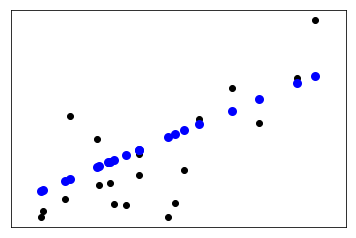

In [22]:
Train_Model(linear_model.LinearRegression(), diabetes)

## Decision Tree

[332.          89.         276.          70.5        165.
 189.5        271.5        117.          68.          94.14285714
  68.          70.         175.2        105.6         55.
 249.5        102.66666667 102.66666667 213.66666667 142.        ]
Mean squared error: 5935.32
Variance score: -0.23


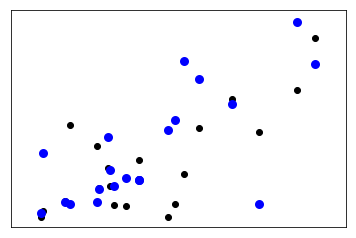

In [23]:
from sklearn.tree import DecisionTreeRegressor

Train_Model(DecisionTreeRegressor(random_state=RANDOM_SEED), diabetes)

## SGD Regressor

[181.73219378 138.76796141 157.29382307 138.37379414 140.73879776
 155.32298673 185.67386647 141.13296503 132.4612851  141.92129957
 173.45468112 131.27878329 153.74631765 144.68047045 126.15460879
 160.44716123 147.43964134 147.43964134 167.54217208 126.54877606]
Mean squared error: 3929.63
Variance score: 0.19


/home/hugo/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


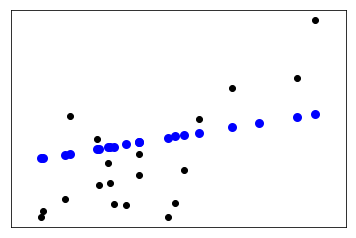

In [24]:
Train_Model(linear_model.SGDRegressor(max_iter=1000, tol=1e-3), diabetes)

## Random Forest Regressor 

[244.72425507 104.63837753 185.2406711  104.32517324 110.39539136
 168.50913124 246.93470048 110.39539136 101.8372304  110.71223603
 190.82420908  99.94625287 158.50714494 121.60277576  98.92001675
 189.75678619 135.82331339 135.82331339 189.75678619  98.92001675]
Mean squared error: 2708.80
Variance score: 0.44


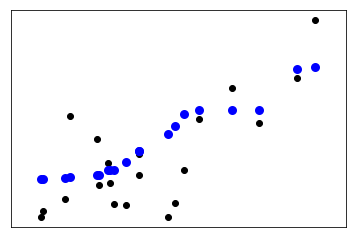

In [25]:
from sklearn.ensemble import RandomForestRegressor
Train_Model(RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100), diabetes)

## SVM Regressor

[160.68725343 130.00268268 143.61189892 129.7410843  131.33570563
 142.0991062  162.83035714 131.60708503 126.0433885  132.15434795
 155.49612385 125.35964415 140.89095016 134.1133822  122.63851265
 146.02635866 136.13078237 136.13078237 151.3345406  122.83323985]
Mean squared error: 3898.82
Variance score: 0.19


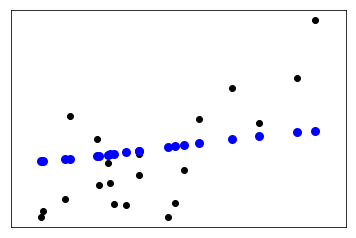

In [26]:
from sklearn.svm import SVR

Train_Model(SVR(gamma='scale', C=1.0, epsilon=0.2), diabetes)

#### Classificadores

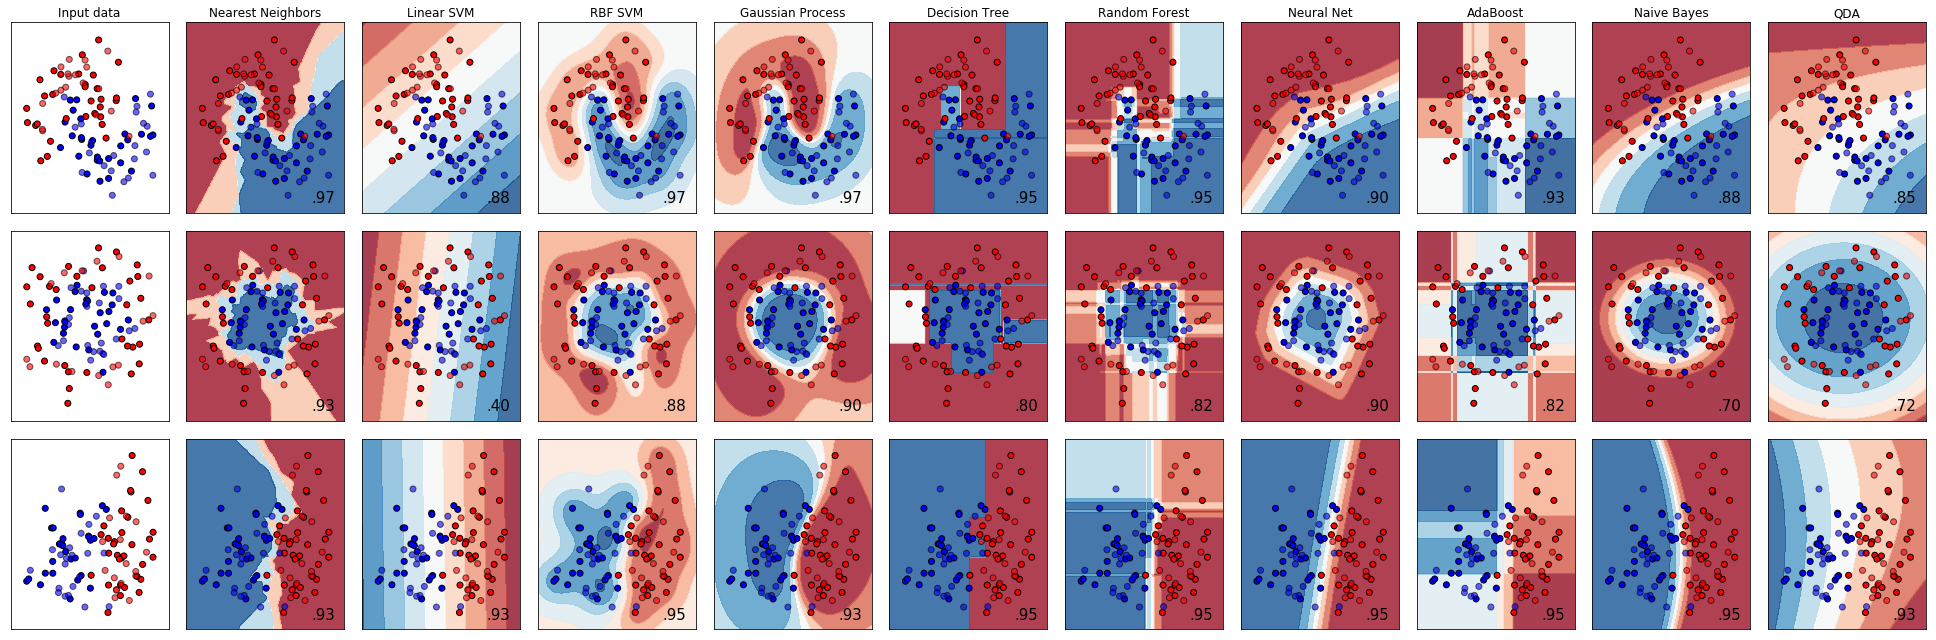

In [27]:
## CODIGO COPIADO TOTALMENTE

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()